### This is my version of the algorithm taught in the chapter #1 of the book: "Learn Algorithmic Trading" by Donadio & Ghosh.

#### This is a simple strategy, where we by GOOG stocks whenever it has dropped in the previous day, and sells in the first day it drops from the time of the buy.
#### Although this strategy has shown profits in the 4 year period below, it is far from being fully validated and safe.

In [20]:
from pandas_datareader import data

In [21]:
start_date = '2014-01-01'
end_date = '2018-01-01'
goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)
goog_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656400.0,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345800.0,550.436829
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551800.0,556.573853
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124300.0,567.303589
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501700.0,568.484192
...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995


In [22]:
import pandas as pd

In [23]:
goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal

""
Date
2014-01-02
2014-01-03
2014-01-06
2014-01-07
2014-01-08
...
2017-12-22
2017-12-26
2017-12-27


In [24]:
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal

,price
Date,
2014-01-02,554.481689
2014-01-03,550.436829
2014-01-06,556.573853
2014-01-07,567.303589
2014-01-08,568.484192
...,...
2017-12-22,1060.119995
2017-12-26,1056.739990
2017-12-27,1049.369995


In [25]:
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
goog_data_signal

,price,daily_difference
Date,,
2014-01-02,554.481689,NaN
2014-01-03,550.436829,-4.044861
2014-01-06,556.573853,6.137024
2014-01-07,567.303589,10.729736
2014-01-08,568.484192,1.180603
...,...,...
2017-12-22,1060.119995,-3.510010
2017-12-26,1056.739990,-3.380005
2017-12-27,1049.369995,-7.369995


In [26]:
import numpy as np

In [27]:
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'] = np.where(goog_data_signal['daily_difference'] >= 0, 1.0, 0.0)
goog_data_signal

,price,daily_difference,signal
Date,,,
2014-01-02,554.481689,NaN,0.0
2014-01-03,550.436829,-4.044861,0.0
2014-01-06,556.573853,6.137024,1.0
2014-01-07,567.303589,10.729736,1.0
2014-01-08,568.484192,1.180603,1.0
...,...,...,...
2017-12-22,1060.119995,-3.510010,0.0
2017-12-26,1056.739990,-3.380005,0.0
2017-12-27,1049.369995,-7.369995,0.0


In [28]:
goog_data_signal['positions'] = goog_data_signal['signal'].diff()
goog_data_signal.head(10)

,price,daily_difference,signal,positions
Date,,,,
2014-01-02,554.481689,NaN,0.0,NaN
2014-01-03,550.436829,-4.044861,0.0,0.0
2014-01-06,556.573853,6.137024,1.0,1.0
2014-01-07,567.303589,10.729736,1.0,0.0
2014-01-08,568.484192,1.180603,1.0,0.0
2014-01-09,563.009705,-5.474487,0.0,-1.0
2014-01-10,562.979797,-0.029907,0.0,0.0
2014-01-13,559.393250,-3.586548,0.0,0.0
2014-01-14,572.553955,13.160706,1.0,1.0


In [29]:
import matplotlib.pyplot as plt

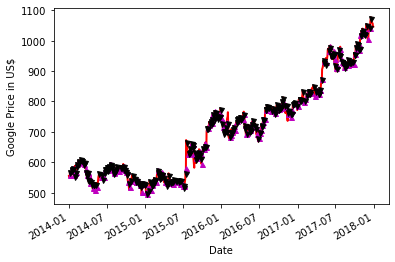

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel="Google Price in US$")
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index, 
         goog_data_signal.price[goog_data_signal.positions == 1.0],
         '^', markersize=5, color='m')
ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index, 
         goog_data_signal.price[goog_data_signal.positions == -1.0],
         'v', markersize=5, color='k')
plt.show()

In [31]:
initial_capital = float(1000.00)

In [32]:
positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)

In [33]:
positions['GOOG'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))

In [34]:
positions.head(10)

,GOOG
Date,
2014-01-02,0.0
2014-01-03,0.0
2014-01-06,1.0
2014-01-07,1.0
2014-01-08,1.0
2014-01-09,0.0
2014-01-10,0.0
2014-01-13,0.0
2014-01-14,1.0


In [35]:
portfolio.head(10)

,positions
Date,
2014-01-02,0.000000
2014-01-03,0.000000
2014-01-06,556.573853
2014-01-07,567.303589
2014-01-08,568.484192
2014-01-09,0.000000
2014-01-10,0.000000
2014-01-13,0.000000
2014-01-14,572.553955


In [36]:
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio.head(10)

,positions,cash
Date,,
2014-01-02,0.000000,NaN
2014-01-03,0.000000,1000.000000
2014-01-06,556.573853,443.426147
2014-01-07,567.303589,443.426147
2014-01-08,568.484192,443.426147
2014-01-09,0.000000,1006.435852
2014-01-10,0.000000,1006.435852
2014-01-13,0.000000,1006.435852
2014-01-14,572.553955,433.881897


In [37]:
portfolio['total'] = portfolio['positions'] + portfolio['cash']
portfolio

,positions,cash,total
Date,,,
2014-01-02,0.000000,NaN,NaN
2014-01-03,0.000000,1000.000000,1000.000000
2014-01-06,556.573853,443.426147,1000.000000
2014-01-07,567.303589,443.426147,1010.729736
2014-01-08,568.484192,443.426147,1011.910339
...,...,...,...
2017-12-22,0.000000,1253.277405,1253.277405
2017-12-26,0.000000,1253.277405,1253.277405
2017-12-27,0.000000,1253.277405,1253.277405


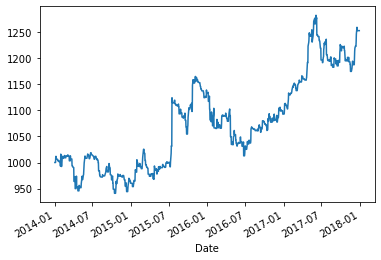

In [38]:
portfolio['total'].plot()
plt.show()

So during this period of time that strategy has been profitable, as the amount of cash increased...